# Tutorial: optimal binning with continuous target

## Basic

To get us started, let's load a well-known dataset from the UCI repository and transform the data into a ``pandas.DataFrame``.

In [1]:
import pandas as pd
from sklearn.datasets import load_boston

In [2]:
data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)

We choose a variable to discretize and the continuous target.

In [3]:
variable = "LSTAT"
x = df[variable].values
y = data.target

Import and instantiate an ``ContinuousOptimalBinning`` object class. We pass the variable name and its data type.

In [4]:
from optbinning import ContinuousOptimalBinning

In [5]:
optb = ContinuousOptimalBinning(name=variable, dtype="numerical")

We fit the optimal binning object with arrays ``x`` and ``y``.

In [6]:
optb.fit(x, y)

ContinuousOptimalBinning(cat_cutoff=None, dtype='numerical', max_bin_size=None,
                         max_n_bins=None, max_n_prebins=20, max_pvalue=None,
                         max_pvalue_policy='consecutive', min_bin_size=None,
                         min_mean_diff=0, min_n_bins=None, min_prebin_size=0.05,
                         monotonic_trend='auto', name='LSTAT',
                         outlier_detector=None, outlier_params=None,
                         prebinning_method='cart', special_codes=None,
                         split_digits=None, time_limit=100, user_splits=None,
                         user_splits_fixed=None, verbose=False)

You can check if an optimal solution has been found via the ``status`` attribute:

In [7]:
optb.status

'OPTIMAL'

You can also retrieve the optimal split points via the ``splits`` attribute:

In [8]:
optb.splits

array([ 4.6500001 ,  5.49499989,  6.86500001,  9.7249999 , 11.67499971,
       13.0999999 , 16.08500004, 19.89999962, 23.31500053])

#### The binning table

The optimal binning algorithms return a binning table; a binning table displays the binned data and several metrics for each bin. Class ``ContinuousOptimalBinning`` returns an object ``ContinuousBinningTable`` via the ``binning_table`` attribute.

In [9]:
binning_table = optb.binning_table

In [10]:
type(binning_table)

optbinning.binning.binning_statistics.ContinuousBinningTable

The `binning_table` is instantiated, but not built. Therefore, the first step is to call the method `build`, which returns a ``pandas.DataFrame``.

In [11]:
binning_table.build()

Bin  Count  Count (%)      Sum       Mean   Min   Max  \
0         [-inf, 4.65)     50   0.098814   1985.9  39.718000  22.8  50.0   
1         [4.65, 5.49)     28   0.055336    853.2  30.471429  21.9  50.0   
2         [5.49, 6.87)     45   0.088933   1188.6  26.413333  20.6  48.8   
3         [6.87, 9.72)     89   0.175889   2274.9  25.560674  11.9  50.0   
4        [9.72, 11.67)     49   0.096838   1057.9  21.589796  15.0  31.0   
5       [11.67, 13.10)     35   0.069170    697.5  19.928571  14.5  27.9   
6       [13.10, 16.09)     66   0.130435   1289.9  19.543939  10.2  30.7   
7       [16.09, 19.90)     69   0.136364   1129.3  16.366667   8.3  27.5   
8       [19.90, 23.32)     28   0.055336    368.4  13.157143   5.0  21.7   
9         [23.32, inf)     47   0.092885    556.0  11.829787   5.0  23.7   
10             Special      0   0.000000      0.0   0.000000   NaN   NaN   
11             Missing      0   0.000000      0.0   0.000000   NaN   NaN   
Totals                    506   1.000000  11401.6  22.532806   NaN   NaN   

        Zeros count  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
5                 0  
6                 0  
7                 0  
8                 0  
9                 0  
10                0  
11                0  
Totals            0

Let's describe the columns of this binning table:

- Bin: the intervals delimited by the optimal split points.
- Count: the number of records for each bin.
- Count (%): the percentage of records for each bin.
- Sum: the target sum for each bin.
- Mean: the target mean for each bin.

The last row shows the total number of records, sum and mean.

You can use the method ``plot`` to visualize the histogram and mean curve. Note that the Bin ID corresponds to the binning table index.

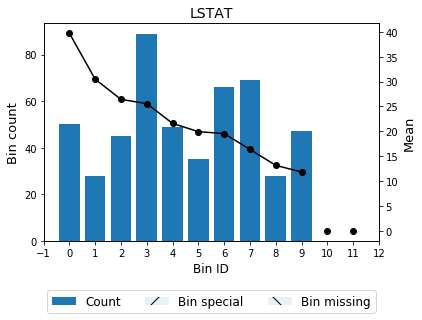

In [12]:
binning_table.plot()

##### Mean transformation

Now that we have checked the binned data, we can transform our original data into mean values. You can check the correctness of the transformation using pandas ``value_counts`` method, for instance.

In [13]:
x_transform_mean = optb.transform(x)

In [14]:
pd.Series(x_transform_mean).value_counts()

25.560674    89
16.366667    69
19.543939    66
39.718000    50
21.589796    49
11.829787    47
26.413333    45
19.928571    35
30.471429    28
13.157143    28
dtype: int64

## Advanced

Many of the advanced options have been covered in the previous tutorials with a binary target. **Check it out!** In this section, we focus on the mean monotonicity trend and the mean difference between bins.

#### Mean monotonicity

The monotonic_trend option permits forcing a monotonic trend to the mean curve. The default setting “auto” should be the preferred option, however, some business constraints might require to impose different trends. The default setting “auto” chooses the monotonic trend most likely to minimize the L1-norm from the options “ascending”, “descending”, “peak” and “valley” using a machine-learning-based classifier.

In [15]:
variable = "INDUS"
x = df[variable].values
y = data.target

In [16]:
optb = ContinuousOptimalBinning(name=variable, dtype="numerical",
                                monotonic_trend="auto")
optb.fit(x, y)

ContinuousOptimalBinning(cat_cutoff=None, dtype='numerical', max_bin_size=None,
                         max_n_bins=None, max_n_prebins=20, max_pvalue=None,
                         max_pvalue_policy='consecutive', min_bin_size=None,
                         min_mean_diff=0, min_n_bins=None, min_prebin_size=0.05,
                         monotonic_trend='auto', name='INDUS',
                         outlier_detector=None, outlier_params=None,
                         prebinning_method='cart', special_codes=None,
                         split_digits=None, time_limit=100, user_splits=None,
                         user_splits_fixed=None, verbose=False)

In [17]:
binning_table = optb.binning_table
binning_table.build()

Bin  Count  Count (%)      Sum       Mean   Min   Max  \
0         [-inf, 3.35)     63   0.124506   1994.0  31.650794  16.5  50.0   
1         [3.35, 5.04)     57   0.112648   1615.2  28.336842  17.2  50.0   
2         [5.04, 6.66)     66   0.130435   1723.7  26.116667  16.0  50.0   
3         [6.66, 8.01)     31   0.061265    692.0  22.322581  14.4  35.2   
4        [8.01, 16.57)    100   0.197628   2045.5  20.455000  11.9  28.7   
5       [16.57, 18.84)    132   0.260870   2165.3  16.403788   5.0  50.0   
6         [18.84, inf)     57   0.112648   1165.9  20.454386   7.0  50.0   
7              Special      0   0.000000      0.0   0.000000   NaN   NaN   
8              Missing      0   0.000000      0.0   0.000000   NaN   NaN   
Totals                    506   1.000000  11401.6  22.532806   NaN   NaN   

        Zeros count  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
5                 0  
6                 0  
7                 0  
8                 0  
Totals            0

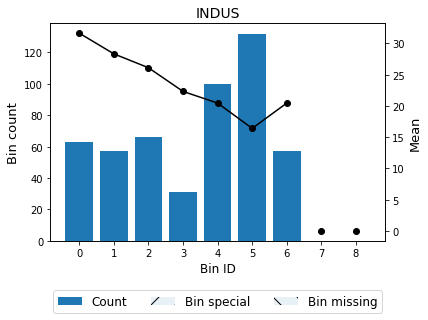

In [18]:
binning_table.plot()

A smoother curve, keeping the valley monotonicity, can be achieved by using ``monotonic_trend="convex"``.

In [19]:
optb = ContinuousOptimalBinning(name=variable, dtype="numerical",
                                monotonic_trend="convex")
optb.fit(x, y)

ContinuousOptimalBinning(cat_cutoff=None, dtype='numerical', max_bin_size=None,
                         max_n_bins=None, max_n_prebins=20, max_pvalue=None,
                         max_pvalue_policy='consecutive', min_bin_size=None,
                         min_mean_diff=0, min_n_bins=None, min_prebin_size=0.05,
                         monotonic_trend='convex', name='INDUS',
                         outlier_detector=None, outlier_params=None,
                         prebinning_method='cart', special_codes=None,
                         split_digits=None, time_limit=100, user_splits=None,
                         user_splits_fixed=None, verbose=False)

In [20]:
binning_table = optb.binning_table
binning_table.build()

Bin  Count  Count (%)      Sum       Mean   Min   Max  \
0        [-inf, 3.99)     92   0.181818   2932.6  31.876087  16.5  50.0   
1        [3.99, 5.04)     28   0.055336    676.6  24.164286  17.2  37.3   
2        [5.04, 6.08)     40   0.079051    878.6  21.965000  16.0  42.8   
3       [6.08, 18.84)    289   0.571146   5747.9  19.888927   5.0  50.0   
4        [18.84, inf)     57   0.112648   1165.9  20.454386   7.0  50.0   
5             Special      0   0.000000      0.0   0.000000   NaN   NaN   
6             Missing      0   0.000000      0.0   0.000000   NaN   NaN   
Totals                   506   1.000000  11401.6  22.532806   NaN   NaN   

        Zeros count  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
5                 0  
6                 0  
Totals            0

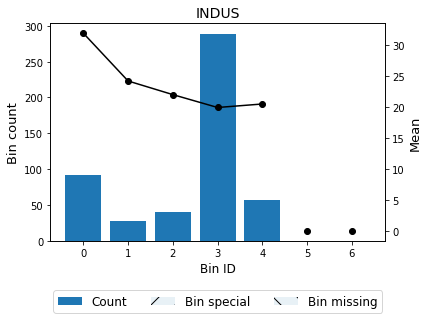

In [21]:
binning_table.plot()

For example, we can force the variable INDUS (proportion of non-retail business acres per town) to be monotonically descending with respect to the house-price.

In [22]:
optb = ContinuousOptimalBinning(name=variable, dtype="numerical",
                                monotonic_trend="descending")
optb.fit(x, y)

ContinuousOptimalBinning(cat_cutoff=None, dtype='numerical', max_bin_size=None,
                         max_n_bins=None, max_n_prebins=20, max_pvalue=None,
                         max_pvalue_policy='consecutive', min_bin_size=None,
                         min_mean_diff=0, min_n_bins=None, min_prebin_size=0.05,
                         monotonic_trend='descending', name='INDUS',
                         outlier_detector=None, outlier_params=None,
                         prebinning_method='cart', special_codes=None,
                         split_digits=None, time_limit=100, user_splits=None,
                         user_splits_fixed=None, verbose=False)

In [23]:
binning_table = optb.binning_table
binning_table.build()

Bin  Count  Count (%)      Sum       Mean   Min   Max  \
0         [-inf, 3.35)     63   0.124506   1994.0  31.650794  16.5  50.0   
1         [3.35, 5.04)     57   0.112648   1615.2  28.336842  17.2  50.0   
2         [5.04, 6.66)     66   0.130435   1723.7  26.116667  16.0  50.0   
3         [6.66, 8.01)     31   0.061265    692.0  22.322581  14.4  35.2   
4        [8.01, 16.57)    100   0.197628   2045.5  20.455000  11.9  28.7   
5       [16.57, 20.73)    162   0.320158   2874.8  17.745679   5.0  50.0   
6         [20.73, inf)     27   0.053360    456.4  16.903704   7.0  23.0   
7              Special      0   0.000000      0.0   0.000000   NaN   NaN   
8              Missing      0   0.000000      0.0   0.000000   NaN   NaN   
Totals                    506   1.000000  11401.6  22.532806   NaN   NaN   

        Zeros count  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
5                 0  
6                 0  
7                 0  
8                 0  
Totals            0

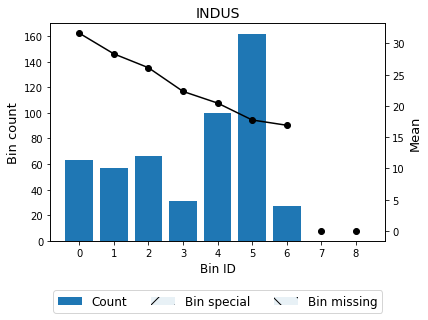

In [24]:
binning_table.plot()

#### Mininum mean difference between consecutive bins

Now, we note that the mean difference between consecutive bins is not significant enough. Therefore, we decide to set ``min_mean_diff=2.0``:

In [25]:
optb = ContinuousOptimalBinning(name=variable, dtype="numerical",
                                monotonic_trend="descending", min_mean_diff=2.0)
optb.fit(x, y)

ContinuousOptimalBinning(cat_cutoff=None, dtype='numerical', max_bin_size=None,
                         max_n_bins=None, max_n_prebins=20, max_pvalue=None,
                         max_pvalue_policy='consecutive', min_bin_size=None,
                         min_mean_diff=2.0, min_n_bins=None,
                         min_prebin_size=0.05, monotonic_trend='descending',
                         name='INDUS', outlier_detector=None,
                         outlier_params=None, prebinning_method='cart',
                         special_codes=None, split_digits=None, time_limit=100,
                         user_splits=None, user_splits_fixed=None,
                         verbose=False)

In [26]:
binning_table = optb.binning_table
binning_table.build()

Bin  Count  Count (%)      Sum       Mean   Min   Max  \
0        [-inf, 3.35)     63   0.124506   1994.0  31.650794  16.5  50.0   
1        [3.35, 5.04)     57   0.112648   1615.2  28.336842  17.2  50.0   
2        [5.04, 6.66)     66   0.130435   1723.7  26.116667  16.0  50.0   
3       [6.66, 16.57)    131   0.258893   2737.5  20.896947  11.9  35.2   
4        [16.57, inf)    189   0.373518   3331.2  17.625397   5.0  50.0   
5             Special      0   0.000000      0.0   0.000000   NaN   NaN   
6             Missing      0   0.000000      0.0   0.000000   NaN   NaN   
Totals                   506   1.000000  11401.6  22.532806   NaN   NaN   

        Zeros count  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
5                 0  
6                 0  
Totals            0

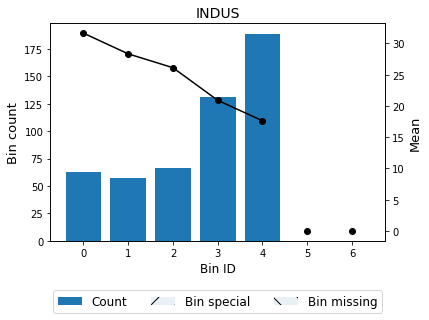

In [27]:
binning_table.plot()